#Preparación de datos - Data Preparation

<p><strong>Objetivo: </strong> El objetivo de este cuaderno es aprender a limpiar y corregir los problemas de calidad de los datos identificados en la exploración utilizando el lenguaje de programación Python en Databricks.  </p>

<h2>Limpieza de Datos</h2>

##Cargar los datos

Carque los mismos datos que se utilizaron en el cuaderno anterior, utilizando la librería Pandas:

In [0]:
# Importar libreria requerida
import pandas as pd
# Read data from CSV file
csv_path = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
df = pd.read_csv(csv_path,sep=",",header= None)
# crear la lista headers 
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df.columns = headers
# Imprimer las primeras cinco filas de un dataframe para probar que todo ok
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


##Tratar datos perdidos

Como se puede ver, algunos signos de interrogación aparecen en el dataframe; estos son valores faltantes que pueden dificultar el futuro análisis.
¿Como identificar y manejar todos aquellos valores que faltan?
¿Como trabajar con valores faltantes?

Revisar los datos perdidos con la función <code>print(df.isnull().sum())</code>

In [0]:
print(df.isnull().sum())

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


En el conjunto de datos del automovil, los datos que faltan aparecen con el signo "?".
Cambie "?" por NaN (Not a Numer) el cual es el marcador por defecto de Python para valores faltantes por razones de conveniencia y velocidad de computo. Aqui se utiliza la función <code>replace()</code>

In [0]:
import numpy as np

# reemplazar "?" por NaN
df.replace("?", np.nan, inplace = True)
df.replace("l", np.nan, inplace = True)
df.head(20)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,NaN


Si desea visualizar los registros que contienen datos perdidos puede ejecutar el siguiente código:

In [0]:
# Para ver todas las filas que tienen valores faltantes
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,NaN
14,1,NaN,bmw,gas,std,four,sedan,rwd,front,103.5,...,164,mpfi,3.31,3.19,9.0,121,4250,20,25,24565
15,0,NaN,bmw,gas,std,four,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760
16,0,NaN,bmw,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315
17,0,NaN,bmw,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880


<h5>Resolviendo los problemas con los datos faltantes: </h5>

<p>Reemplazar con la media</p>
La variable <b>normalized-losses</b> tiene 41 datos faltantes. Revisar la simetría del atributo y luego decidir si se utilza media o mediana:

/databricks/python/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
Out[5]: <AxesSubplot:xlabel='normalized-losses', ylabel='Density'>

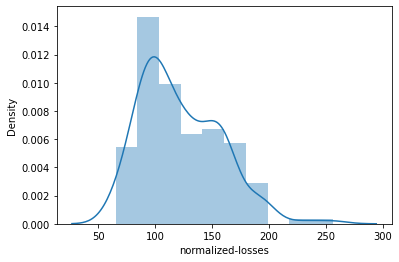

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(df["normalized-losses"])

In [0]:
# Calcular estadísticas de la variable city-mpg
mean = df['city-mpg'].mean()
median = df['city-mpg'].median()
mode = df['city-mpg'].mode()
skew = df['city-mpg'].skew()
kurt = df['city-mpg'].kurt()
print("La media es:", mean)
print("La mediana es:", median)
print("La moda es:", mode)
print("El sesgo es:", skew)
print("La kurtosis es:", kurt)

La media es: 25.21951219512195
La mediana es: 24.0
La moda es: 0    31
dtype: int64
El sesgo es: 0.6637040288148164
La kurtosis es: 0.5786483404849747


In [0]:
#Calcular el mediana de la columna
m_norm_loss = df["normalized-losses"].astype("float").median(axis=0)
#Remplazar "NaN por el valor de la mediana en la columna "normalized-losses"
df["normalized-losses"].replace(np.nan, m_norm_loss, inplace=True)

In [0]:
df.head(20)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,115.0,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,115.0,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,115.0,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,NaN


<p>Remplazar con la Frecuencia:</p>
La variable <b>num-of-doors</b> tiene 2 datos faltantes, remplazar con "four". Razón: El 84% de los sedanes es de cuatro puertas. Debido que tener cuatro puertas es mas probable que ocurra.

In [0]:
#Para ver los valores presentes en una columna podemos usar el método ".value_counts()":
df['num-of-doors'].value_counts()

Out[22]: four    114
two      89
Name: num-of-doors, dtype: int64

In [0]:
#Podemos ver que el tipo mas común es el de cuatro puertas. Además podemos usar el método .idxmax()" para calcular automaticamente el tipo mas comun:
df['num-of-doors'].value_counts().idxmax()

Out[23]: 'four'

In [0]:
#Reemplazamos los valores faltantes en 'num-of-doors' con el valor más frecuente o la moda
df["num-of-doors"].replace(np.nan, "four", inplace=True)

In [0]:
print(df.isnull().sum())

symboling             0
normalized-losses     0
make                  0
fuel-type             0
aspiration            0
num-of-doors          0
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type          12
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64


<p>Eliminar filas</p>
<p>Eliminar todas las filas que tienen datos faltantes en la columna <b>price</b></p>

In [0]:
#Elimina toda la fila con NaN en la columna "price"
# df_new = df.dropna(subset=["price"], axis=0)
df.dropna(subset=["price"], axis=0, inplace=True)

#Restablece el índice debido a que eliminamos dos filas
df.reset_index(drop=True, inplace=True)

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
   <strong>AHORA TÚ: </strong>  
  <p>
Calcula el valor de la media para la columna 'peak-rpm' y remplaza "NaN" por el valor de la media:
</p>
</div>

In [0]:
# Escribe tu código aquí y presiona Shift+Enter para ejecutar


Haz doble clic <b>aquí</b> para ver la solución.

<!-- Respuesta::

avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

-->

Compruebe el resultado final:

In [0]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


##Cambiar tipos de datos de las columnas

Un paso importante en la limpieza de datos es asegurarse que el formato de cada columna sea el correcto (int, float, text u otro)

In [0]:
#Listar los tipos de datos para cada columna
df.dtypes

Out[29]: symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

<p>Como podemos ver arriba, algunas columnas no tienen el tipo correcto de dato. Las variables numéricas deben ser de tipo 'float' o 'int', y las variables con cadenas como pueden ser las categorias deben ser de tipo 'object'. Tome un minuto para analizar los tipos de datos de cada columna, puede comparar con el diccionario de datos compartido en la clase.</p>

In [0]:
#Convertir el tipo de datos al formato apropiado
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
   <strong>AHORA TÚ: </strong>  
  <p>
    Cambie el valor de la columna <b>peak-rpm</b> a tipo <b>float</b>
</p>
</div>

In [0]:
# Escribe tu código aquí y presiona Shift+Enter para ejecutar


Haz doble clic <b>aquí</b> para ver la solución.

<!-- Respuesta::

df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

-->

Vuelva a ejecutar la función <code>df.dtypes</code> para validar el cambio.

##Identificar atributos que todos son iguales o todos son diferentes

Para identificar variables donde todos sus valores sean iguales, primero se pueden analizar las variables categóricas. La configuración predeterminada de la funcion <code>describe</code> omite las variables de tipo objeto. Podemos aplicar la función en las variables de tipo ‘objeto’ de la siguiente manera:

In [0]:
#unique, top y frequency ("único, superior y frecuencia").
df.describe(include="object")

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower,peak-rpm
count,201,201,201,201,201,201,201,189,201,201,199,199
unique,22,2,2,2,5,3,2,5,7,8,58,22
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi,68,4800
freq,32,181,165,115,94,118,198,145,157,92,19,36


In [0]:
df['engine-location'].value_counts()

Out[33]: front    198
rear       3
Name: engine-location, dtype: int64

Out[34]: <seaborn.axisgrid.FacetGrid at 0x7fca88865e80>

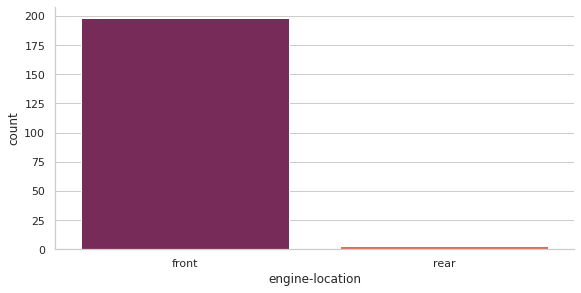

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
sns.catplot(x="engine-location", kind="count", palette="rocket", data=df, height = 4, aspect = 2)

###Eliminar columnas

Para eliminar una columna, o varias columnas, use el nombre de la columna y especifique el "eje". Eliminemos la columna <b>engine-location</b> pues no aporta a la predicción del precio.

In [0]:
#Si utilizamos inplace=True los cambios se aplican directamente sobre el dataframe
df.drop("engine-location", axis=1, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115,alfa-romero,gas,std,two,convertible,rwd,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,115,alfa-romero,gas,std,two,convertible,rwd,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,115,alfa-romero,gas,std,two,hatchback,rwd,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Otras alternativas para eliminar columnas son:
<p>Si no quiero perder la columna de los datos originales, asigno a un nuevo dataframe:</p>
<code>new_df = df.drop("Column_Name", axis=1)</code>
<p>Si quiero eliminar varias columnas:</p>
<code>new_df = df.drop(["Column_Name_1","Column_Name_2","Column_Name_N"], axis=1)</code>

###Eliminar filas

Las filas también se pueden eliminar utilizando la función <code>drop</code>, especificando <code>axis = 0</code>.

Podemos eliminar una fila específica que deseemos eliminar, ya sea porque tiene datos faltantes o datos atípicos. A manera de prueba eliminemos la fila con índices 0 y 1, pero sin afectar el dataframe original.

In [0]:
delete_rows = df.drop([0,1], axis=0)
delete_rows.head(4)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
2,1,115,alfa-romero,gas,std,two,hatchback,rwd,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
5,2,115,audi,gas,std,two,sedan,fwd,99.8,177.3,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.0


Si desemos mantener el Indice (el índice funciona como un label, id o tag de las filas) podemos utilizar la función <code>reset_index</code>

In [0]:
#Actualización del index
delete_rows.reset_index(drop=True)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,115,alfa-romero,gas,std,two,hatchback,rwd,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
1,2,164,audi,gas,std,four,sedan,fwd,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
2,2,164,audi,gas,std,four,sedan,4wd,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
3,2,115,audi,gas,std,two,sedan,fwd,99.8,177.3,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.0
4,1,158,audi,gas,std,four,sedan,fwd,105.8,192.7,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,-1,95,volvo,gas,std,four,sedan,rwd,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
195,-1,95,volvo,gas,turbo,four,sedan,rwd,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
196,-1,95,volvo,gas,std,four,sedan,rwd,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
197,-1,95,volvo,diesel,turbo,four,sedan,rwd,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


##Identificar y tratar posibles datos atípicos

La primera herramienta que se puede aplicar para identificar outliers, son los gráficos de BoxPlot. Se muestra el atributo <b>length</b> con un gráfico de BoxPlot.

/databricks/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/databricks/python/lib/python3.8/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
Out[38]: <AxesSubplot:xlabel='length'>

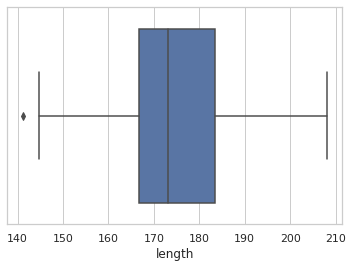

In [0]:
sns.boxplot(df["length"], orient="v")

Se puede evaluar cada dato y decidir si efectivamente son datos atípicos o son datos normales solo que extremos.

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
   <strong>AHORA TÚ: </strong>  
  <p>
    Elija otra variable y grafique su BoxPlot para identificar datos atípicos:
</p>
</div>

In [0]:
# Escribe tu código aquí y presiona Shift+Enter para ejecutar


Haz doble clic <b>aquí</b> para ver la solución.

<!-- Posible respuesta:

sns.boxplot(df["highway-mpg"], orient="v")

-->

Lo segundo que se puede hacer es comparar dos atributos y ver si entre ellos surge algún dato atípico. Se muestran los atributos peso <b>curb-weight</b> y millas por galon en autopista <b>highway-mpg</b> con un gráfico de puntos.

Out[40]: <AxesSubplot:xlabel='curb-weight', ylabel='highway-mpg'>

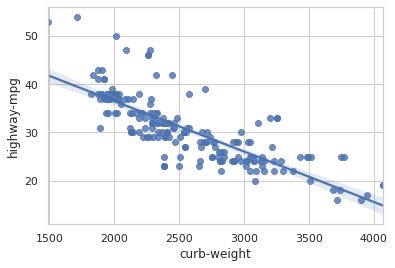

In [0]:
sns.set(style="whitegrid")
sns.regplot(x="curb-weight", y="highway-mpg", data=df)

Cuando se quiere analizar todas las variables para saber si hay valores atípicos y inconsistentes entre ellas, se puede utilizar el algoritmo de LOF para identificar aquellos registros atípicos:
<p>Utilice la libería ScikitLearn que contiene el algoritmo para LOF, para fines prácticos aplique el algoritmo sobre los atributos numéricos:</p>

In [0]:
#Importe la librería ScikitLearn específicamente el algoritmo de LOF
from sklearn.neighbors import LocalOutlierFactor

A continuación se aplica el modelo a las columnas numéricas y aquella que no tienen valores faltantes (el algoritmo no soporta datos faltantes) y se muestran los registros que el algoritmo identifica como inconsistentes:

In [0]:
#Seleccionar columnas
select_df = df[["symboling","normalized-losses","wheel-base","length","width","height","curb-weight","engine-size"]]

#Especificar el modelo que se va a utilizar
model = LocalOutlierFactor(n_neighbors = 20)

#Ajuste al modelo
y_pred = model.fit_predict(select_df)
y_pred

Out[42]: array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [0]:
#Filtrar los indices de los outliers
outlier_index = (y_pred == -1) #los valores negativos son outliers

#Filtrar los valores de los outliers en el dataframe
outlier_values = select_df.iloc[outlier_index]
outlier_values

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size
16,0,115,110.0,197.0,70.9,56.3,3505,209
17,2,121,88.4,141.1,60.3,53.2,1488,61
29,2,137,86.6,144.6,63.9,50.8,1713,92
30,2,137,86.6,144.6,63.9,50.8,1819,92
44,0,145,113.0,199.6,69.6,52.8,4066,258
45,0,115,113.0,199.6,69.6,52.8,4066,258
46,0,115,102.0,191.7,70.6,47.8,3950,326
64,-1,93,110.0,190.9,70.3,56.5,3515,183
65,-1,93,110.0,190.9,70.3,58.7,3750,183
66,0,93,106.7,187.5,70.3,54.9,3495,183


El algoritmo LOF identifica 21 datos inconsistentes en el conjunto de datos.

##Atributos redundantes

Para identificar los atributos redundantes se pueden utilizar la matriz de correlación e indentificar correlaciones entre atributos. Se puede calcular la correlación entre variables de tipo “int64” o “float64” utilizando el método <code>corr</code> de la librería Pandas. Los elementos diagonales tiene siempre valor 1:

In [0]:
corrMatrix=df.corr()
corrMatrix

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,city-mpg,highway-mpg,price
symboling,1.000000,0.457735,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.144324,-0.008245,-0.182196,-0.035527,0.036233,-0.082391
normalized-losses,0.457735,1.000000,-0.075109,-0.009116,0.061799,-0.371830,0.065393,0.073586,-0.051124,0.044498,-0.115967,-0.193896,-0.150773,0.094366
wheel-base,-0.535987,-0.075109,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.494884,0.158502,0.250313,-0.470606,-0.543304,0.584642
length,-0.365404,-0.009116,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.610051,0.124139,0.159733,-0.665192,-0.698142,0.690628
width,-0.242423,0.061799,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544924,0.188829,0.189867,-0.633531,-0.680635,0.751265
height,-0.550160,-0.371830,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.185907,-0.062704,0.259737,-0.049800,-0.104812,0.135486
curb-weight,-0.233118,0.065393,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644617,0.167562,0.156433,-0.749543,-0.794889,0.834415
engine-size,-0.110581,0.073586,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.582857,0.209523,0.028889,-0.650546,-0.679571,0.872335
bore,-0.144324,-0.051124,0.494884,0.610051,0.544924,0.185907,0.644617,0.582857,1.000000,-0.055390,0.001250,-0.592655,-0.599218,0.543436
stroke,-0.008245,0.044498,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,-0.034696,-0.035201,0.082310


Out[45]: <AxesSubplot:>

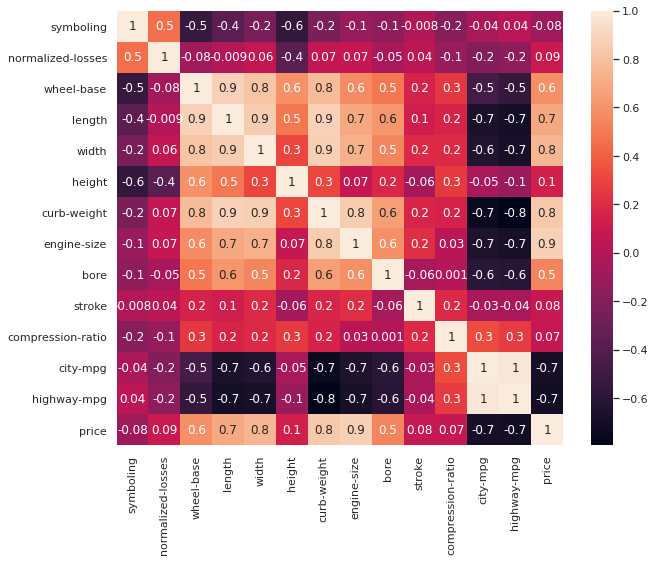

In [0]:
#Importe nuevamente las librias de Seaborn y Matplotlib en caso de que no estén importadas
import seaborn as sns
import matplotlib.pyplot as plt
#Sentencia para ajustar la visualización y tamaño del gráfico
f, ax = plt.subplots(figsize=(10, 8))
#HeatMap de Seaborn, annot:muestra valores, fmt:decimales, ax:visializacion
sns.heatmap(corrMatrix,annot = True,fmt='.1g',ax=ax)

<hr/>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">
   <strong>AHORA TÚ: </strong>  
  <p>Encuentre la correlación entre las siguientes columnas: bore, stroke, compression-ratio , y horsepower y muestre su matriz de correlación:</p>
<p>Pista: si desea seleccionar aquellas columnas utilice la siguiente sintaxis: df[['bore','stroke' ,'compression-ratio','horsepower']]</p>
</div>
<hr/>

In [0]:
# Escribe tu código aquí y presiona Shift+Enter para ejecutar


Haz doble clic <b>aquí</b> para ver la solución.

<!-- The answer is below:

matrix = df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()  
sn.heatmap(matrix,annot = True,fmt='.1g')

-->

##Links de ayuda interesantes
<ul>
    <li>Documentacion de LOF: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html</li>
    <li>Ajustes a los parámetros de la matriz de correlación: https://heartbeat.fritz.ai/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07</li>
<ul>